# Determination of a prospective tariff for a telecom company

The goal: to make a preliminary analysis of tariffs on a small sample of customers (500 users) and determine who they are, what tariff they use, and how many calls and messages they sent in 2018. It is necessary to analyze the behavior of customers and draw a conclusion - **which tariff is better** for the company from the point of investment of the marketing budget.

## Research plan:

1. Investigate the source data

2. Prepare data for future use

3. Data analysis

4. Hypothesis testing

  - the average revenue of users of the "Ultra" and "Smart" tariffs differs;

  - the average revenue of users from Moscow differs from the revenue of users from other regions.

5. Development of a conclusion

## 1. Data load and exploaring

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
# data load
calls = pd.read_csv('calls.csv', sep=',' )
internet = pd.read_csv('internet.csv', sep=',' )
messages = pd.read_csv('messages.csv', sep=',' )
tariffs = pd.read_csv('tariffs.csv', sep=',' )
users = pd.read_csv('users.csv', sep=',' )

In [3]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


The calls table contains information about calls:
  - id — unique call number
  - call_date — date of call
  - duration — the length of the call in minutes
  - user_id — identifier of the user who made the call
 
**At first glance, the data appears to be in order.**

In [5]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [6]:
internet.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


The internet table contains information about internet sessions:
  - id — unique session number
  - mb_used - the amount of Internet traffic spent per session (in megabytes)
  - session_date — date of internet session
  - user_id - user ID


**There is an Unnamed:0 column - apparently, this is a column with indexes, also a date column is in the object format.**

In [7]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [8]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


The messages table contains information about messages:
  - id — unique message number
  - message_date — date of message
  - user_id — identifier of the user who sent the message


**Column with date is in object format.**

In [9]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [10]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


The tariffs table contains tariff information:
 - tariff_name — tariff name
 - rub_monthly_fee —  the monthly subscription fee in rubles
 - minutes_included - the number of minutes of conversation per month included in the subscription fee
 - messages_included - number of messages per month included in the subscription fee
 - mb_per_month_included - the amount of Internet traffic included in the subscription fee (in megabytes)
 - rub_per_minute - the cost of a minute of conversation in excess of the tariff package (for example, if the tariff includes 100 minutes of conversation per month, then a fee will be charged from 101 minutes)
 - rub_per_message - the cost of sending a message in excess of the tariff package

**At first glance, the data appears to be in order.**

In [11]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [12]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [13]:
# duplicates check
users[users.duplicated()]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff


The users table contains information about users):
 - user_id - unique user ID
 - first_name - username
 - last_name - last name of the user
 - age — user's age (years)
 - reg_date — date of tariff activation (day, month, or year)
 - churn_date — date of termination of the tariff use (if the value is omitted, then the tariff was still valid at the time of data upload)
 - city — user's city of residence
 - tariff — name of a tariff plan


**There are gaps in the churn_date values ​​(this means that the tariff was still in effect at the time the data was uploaded). There are als columns with dates in object format (churn_date and reg_date). No duplicates found.**

<div class="alert alert-info">
Checking for null values in data
</div>

In [14]:
calls['duration'].value_counts()

0.00     39613
4.49       142
5.50       142
6.15       141
6.38       141
         ...  
27.02        1
26.19        1
25.34        1
27.13        1
24.28        1
Name: duration, Length: 2871, dtype: int64

In [15]:
internet['mb_used'].value_counts()

0.00      19598
197.56        9
447.30        9
335.91        9
108.95        8
          ...  
72.49         1
846.22        1
429.17        1
899.03        1
483.87        1
Name: mb_used, Length: 70003, dtype: int64

### Conclusion

I found that in several tables, columns with dates are presented in the wrong format (object). They need to be converted to date format.
<br>There is an Unnamed:0 column in the table with Internet traffic usage statistics - apparently, this is a column with indexes that can be deleted.
<br>
Files with information on calls, internet usage, messages and users have user_id data. With this value it will be possible to find information on the use of communication services by each subscriber.
<br>
The data contains 39613 calls with a length of 0.0, and 19598 Internet sessions with a volume of 0 Mb. Perhaps this is how unanswered calls are displayed, when formally there was a call, but no one picked up the phone, therefore the duration is 0.0. Zero values ​​in the volume of Internet traffic can be explained by the fact that the user tried to access the Internet, but there were some interruptions in the connection, so he could not download anything. I suggest leaving these values ​​in the data for further analysis.

## 2. Data preprocessing

In [16]:
# Converting date columns to the correct format

In [17]:
calls = calls.astype({'call_date': 'datetime64[ns]'})
users = users.astype({'churn_date': 'datetime64[ns]'},{'reg_date': 'datetime64[ns]'})
messages = messages.astype({'message_date': 'datetime64[ns]'})
internet = internet.astype({'session_date': 'datetime64[ns]'})

In [18]:
# Removing a column with duplicated indexes in the Internet usage table
internet = internet.drop('Unnamed: 0', 1)

In [19]:
# Adding a month column
calls['month'] = calls['call_date'].dt.month
messages['month'] = messages['message_date'].dt.month
internet['month'] = internet['session_date'].dt.month

<div class="alert alert-info">
Rounding the duration of calls to the minute, because payment over the tariff goes per minute
</div>

In [20]:
calls['duration'] = calls['duration'].apply(np.ceil)

In [21]:
# creating pivot tables and combining them into one
calls_count = calls.pivot_table(index = ['user_id','month'], values = 'id', aggfunc = 'count')
calls_minutes = calls.pivot_table(index = ['user_id','month'], values = 'duration', aggfunc = 'sum')

In [22]:
calls_pivot = calls_count.merge(calls_minutes, on=['user_id','month'])
calls_pivot.rename(columns = {'id':'calls_qty'}, inplace = True)
calls_pivot

calls_qty  duration
user_id month                     
1000    5             22     159.0
        6             43     172.0
        7             47     340.0
        8             52     408.0
        9             58     466.0
...                  ...       ...
1498    10            41     247.0
1499    9              9      70.0
        10            68     449.0
        11            74     612.0
        12            69     492.0

[3174 rows x 2 columns]

In [23]:
msg_count = messages.pivot_table(index = ['user_id','month'], values = 'id', aggfunc = 'count')
msg_count.rename(columns = {'id':'message_qty'}, inplace = True)

In [24]:
calls_pivot = calls_pivot.join(msg_count, how = 'outer')

<div class="alert alert-info">
Convert traffic from megabytes to gigabytes and round up to the upper value
</div>

In [25]:
internet['mb_used'] = internet['mb_used'].apply(np.ceil)
internet['mb_used'] = internet['mb_used']/1024
internet.rename(columns = {'mb_used':'gb_used'}, inplace = True)

In [26]:
internet_count = internet.pivot_table(index = ['user_id','month'], values = 'gb_used', aggfunc = 'sum')
internet_count

gb_used
user_id month           
1000    5       2.203125
        6      22.711914
        7      13.687500
        8      13.740234
        9      14.239258
...                  ...
1498    10     20.121094
1499    9       1.804688
        10     17.391602
        11     17.562500
        12     12.770508

[3203 rows x 1 columns]

In [27]:
calls_pivot = calls_pivot.join(internet_count, how = 'outer')
calls_pivot

calls_qty  duration  message_qty    gb_used
user_id month                                             
1000    5           22.0     159.0         22.0   2.203125
        6           43.0     172.0         60.0  22.711914
        7           47.0     340.0         75.0  13.687500
        8           52.0     408.0         81.0  13.740234
        9           58.0     466.0         57.0  14.239258
...                  ...       ...          ...        ...
1498    10          41.0     247.0         42.0  20.121094
1499    9            9.0      70.0         11.0   1.804688
        10          68.0     449.0         48.0  17.391602
        11          74.0     612.0         59.0  17.562500
        12          69.0     492.0         66.0  12.770508

[3214 rows x 4 columns]

In [28]:
calls_pivot=calls_pivot.reset_index()

In [29]:
calls_pivot

,user_id,month,calls_qty,duration,message_qty,gb_used
0,1000,5,22.0,159.0,22.0,2.203125
1,1000,6,43.0,172.0,60.0,22.711914
2,1000,7,47.0,340.0,75.0,13.687500
3,1000,8,52.0,408.0,81.0,13.740234
4,1000,9,58.0,466.0,57.0,14.239258
...,...,...,...,...,...,...
3209,1498,10,41.0,247.0,42.0,20.121094
3210,1499,9,9.0,70.0,11.0,1.804688
3211,1499,10,68.0,449.0,48.0,17.391602
3212,1499,11,74.0,612.0,59.0,17.562500


In [30]:
# adding user data to a table
calls_pivot = calls_pivot.merge(users[['user_id', 'tariff', 'city']], on='user_id', how='left')
calls_pivot

,user_id,month,calls_qty,duration,message_qty,gb_used,tariff,city
0,1000,5,22.0,159.0,22.0,2.203125,ultra,Краснодар
1,1000,6,43.0,172.0,60.0,22.711914,ultra,Краснодар
2,1000,7,47.0,340.0,75.0,13.687500,ultra,Краснодар
3,1000,8,52.0,408.0,81.0,13.740234,ultra,Краснодар
4,1000,9,58.0,466.0,57.0,14.239258,ultra,Краснодар
...,...,...,...,...,...,...,...,...
3209,1498,10,41.0,247.0,42.0,20.121094,smart,Владикавказ
3210,1499,9,9.0,70.0,11.0,1.804688,smart,Пермь
3211,1499,10,68.0,449.0,48.0,17.391602,smart,Пермь
3212,1499,11,74.0,612.0,59.0,17.562500,smart,Пермь


In [31]:
# empty values will be filled with zeros, because it is likely that users did not use the service in a particular month
calls_pivot['calls_qty'] = calls_pivot['calls_qty'].fillna(0).astype(int)
calls_pivot['duration'] = calls_pivot['duration'].fillna(0).astype(int)
calls_pivot['message_qty'] = calls_pivot['message_qty'].fillna(0).astype(int)
calls_pivot['gb_used'] = calls_pivot['gb_used'].fillna(0).astype(int)

In [32]:
calls_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      3214 non-null   int64 
 1   month        3214 non-null   int64 
 2   calls_qty    3214 non-null   int32 
 3   duration     3214 non-null   int32 
 4   message_qty  3214 non-null   int32 
 5   gb_used      3214 non-null   int32 
 6   tariff       3214 non-null   object
 7   city         3214 non-null   object
dtypes: int32(4), int64(2), object(2)
memory usage: 175.8+ KB


<div class="alert alert-info">
Transfer of data on the included Internet traffic to the tariff from Mb to Gb.
</div>

In [33]:
tariffs['gb_per_month_included'] = tariffs['mb_per_month_included']/1024
del tariffs['mb_per_month_included']
tariffs

,messages_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included
0,50,500,550,200,3,3,smart,15.0
1,1000,3000,1950,150,1,1,ultra,30.0


In [34]:
# monthly revenue calculation function
def user_income(data):
    month_income = 0
    if data.loc['tariff'] == 'smart':
        month_income = tariffs.loc[0, 'rub_monthly_fee']
        if data['duration'] > tariffs.loc[0, 'minutes_included']:
            month_income += (data['duration'] - tariffs.loc[0, 'minutes_included'])*tariffs.loc[0, 'rub_per_minute']
        if data['message_qty'] >  tariffs.loc[0, 'messages_included']:
            month_income += (data['message_qty'] - tariffs.loc[0, 'messages_included'])*tariffs.loc[0, 'rub_per_message']
        if data['gb_used'] > tariffs.loc[0, 'gb_per_month_included']:
            month_income += (data['gb_used'] - tariffs.loc[0, 'gb_per_month_included'])*tariffs.loc[0, 'rub_per_gb']
    else:
        month_income = tariffs.loc[1, 'rub_monthly_fee']
        if data['duration'] > tariffs.loc[1, 'minutes_included']:
            month_income += (data['duration'] - tariffs.loc[1, 'minutes_included'])*tariffs.loc[1, 'rub_per_minute'] 
        if data['message_qty'] >  tariffs.loc[1, 'messages_included']:
            month_income += (data['message_qty'] - tariffs.loc[1, 'messages_included'])*tariffs.loc[1, 'rub_per_message']
        if data['gb_used'] > tariffs.loc[1, 'gb_per_month_included']:
            month_income += (data['gb_used'] - tariffs.loc[1, 'gb_per_month_included'])*tariffs.loc[1, 'rub_per_gb']
 
    return month_income

In [35]:
calls_pivot['month_income'] = calls_pivot.apply(user_income, axis=1)

In [36]:
calls_pivot

,user_id,month,calls_qty,duration,message_qty,gb_used,tariff,city,month_income
0,1000,5,22,159,22,2,ultra,Краснодар,1950.0
1,1000,6,43,172,60,22,ultra,Краснодар,1950.0
2,1000,7,47,340,75,13,ultra,Краснодар,1950.0
3,1000,8,52,408,81,13,ultra,Краснодар,1950.0
4,1000,9,58,466,57,14,ultra,Краснодар,1950.0
...,...,...,...,...,...,...,...,...,...
3209,1498,10,41,247,42,20,smart,Владикавказ,1550.0
3210,1499,9,9,70,11,1,smart,Пермь,550.0
3211,1499,10,68,449,48,17,smart,Пермь,950.0
3212,1499,11,74,612,59,17,smart,Пермь,1313.0


### Conclusion

I have converted date columns presented in incorrect format (object) to datetime64[ns] format.
<br>In the table with Internet traffic usage statistics, I deleted the Unnamed:0 column, which contained indexes.
<br>

I also calculated for each user:
  - the number of calls made and spent minutes of conversation by month;
  - the number of sent messages by month;
  - the amount of Internet traffic used by months;
  - monthly revenue from each user.

## 3. Data analysis

In [37]:
# creation of separate tables for each tariff
smart = calls_pivot.query('tariff == "smart"')[['duration', 'message_qty', 'gb_used' ]]
ultra = calls_pivot.query('tariff == "ultra"')[['duration', 'message_qty', 'gb_used' ]]

In [38]:
# calculation of average
print('The average number of minutes of conversation, messages and the volume of Internet traffic on the smart tariff.')
smart.mean()

The average number of minutes of conversation, messages and the volume of Internet traffic on the smart tariff.


duration       417.934948
message_qty     33.384029
gb_used         15.360700
dtype: float64

In [39]:
print('The average number of minutes of conversation, messages and the volume of Internet traffic on the ultra tariff.')
ultra.mean()

The average number of minutes of conversation, messages and the volume of Internet traffic on the ultra tariff.


duration       526.623350
message_qty     49.363452
gb_used         18.540102
dtype: float64

In [40]:
# dispersion calculation
print('Dispersion at the smart tariff.')
smart_var = np.var(smart)
smart_var

Dispersion at the smart tariff.


duration       36203.066652
message_qty      796.455483
gb_used           33.130551
dtype: float64

In [41]:
print('Dispersion at the ultra tariff.')
ultra_var = np.var(ultra)
ultra_var

Dispersion at the ultra tariff.


duration       100771.223617
message_qty      2282.946075
gb_used            96.782402
dtype: float64

In [42]:
# standard deviation calculation
print('Standard deviation at the smart tariff.')
np.sqrt(smart_var)

Standard deviation at the smart tariff.


duration       190.271035
message_qty     28.221543
gb_used          5.755914
dtype: float64

In [43]:
print('Standard deviation at the ultra tariff.')
np.sqrt(ultra_var)

Standard deviation at the ultra tariff.


duration       317.444836
message_qty     47.780185
gb_used          9.837805
dtype: float64

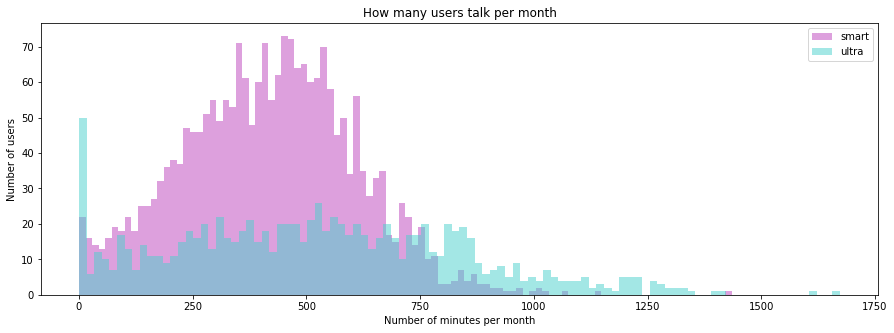

In [44]:
# histograms for minutes of conversation
fig, ax = plt.subplots(figsize=(15,5))
ax.hist(smart['duration'], bins=100, color = 'plum')
ax.hist(ultra['duration'], alpha = 0.5, bins=100, color = 'mediumturquoise')
ax.set(title='How many users talk per month', ylabel='Number of users', xlabel='Number of minutes per month')
plt.rc('axes', titlesize=20) 
plt.rc('axes', labelsize=20)
ax.legend(['smart','ultra'])
plt.show()

The histogram shows that users of the Smart tariff talk for about 400 minutes on average and the values are evenly distributed. And among the users of the ultra tariff there are many who do not speak on the phone at all (about 50 records), and also more people who speak more than 700 minutes a month.

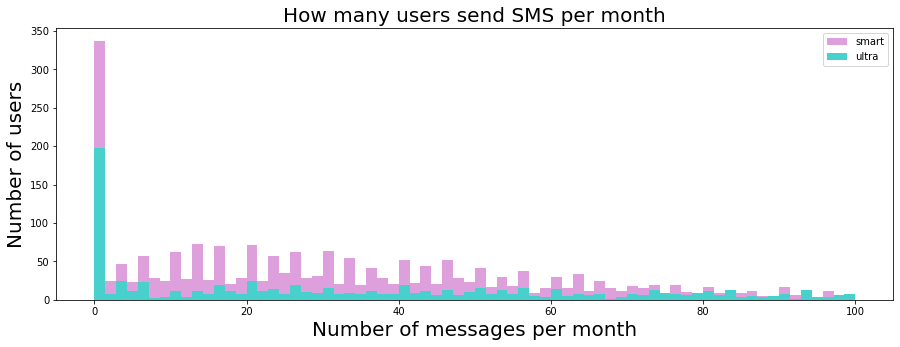

In [45]:
# histograms for messages

fig, ax = plt.subplots(figsize=(15,5))
ax.hist(smart['message_qty'], range=(0, 100), bins=70, color = 'plum')
ax.hist(ultra['message_qty'], range=(0, 100), bins=70, color = 'mediumturquoise')
ax.set(title='How many users send SMS per month', ylabel='Number of users', xlabel='Number of messages per month')
plt.rc('axes', titlesize=20) 
plt.rc('axes', labelsize=20)
ax.legend(['smart','ultra'])
plt.show()

But in the number of SMS there is some pattern for users of both tariffs - many of them do not send messages at all.

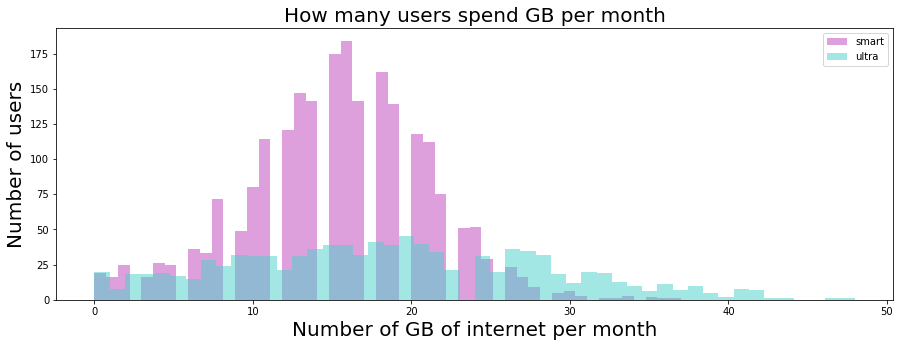

In [46]:
# histograms for internet traffic

fig, ax = plt.subplots(figsize=(15,5))
ax.hist(smart['gb_used'], bins=50, color = 'plum')
ax.hist(ultra['gb_used'], alpha = 0.5, bins=50, color = 'mediumturquoise')
ax.set(title='How many users spend GB per month', ylabel='Number of users', xlabel='Number of GB of internet per month')
plt.rc('axes', titlesize=20) 
plt.rc('axes', labelsize=20)
ax.legend(['smart','ultra'])
plt.show()

The amount of traffic used by smart tariff subscribers looks like a normal distribution, but in the ultra tariff there is no such obvious surge, the values are more evenly distributed. Ultra tariff subscribers often use a very large amount of Internet (more than 25 GB per month).

### Conclusions

I studied the behavior of the operator's clients based on a sample.
<br>Below are the monthly averages:

|Tariff|smart|ultra|
|:----|:----|:----|
|Qty of minutes|394|497|
|Qty of messages|33|49|
|Qty of internet (Gb)|15|18.5|

On average, ultra users use it the most.
<br>
<br>I calculated the mean, variance, and standard deviation and built histograms.
With the help of histograms, it was possible to draw the following conclusions:
 - Smart tariff users talk for about 400 minutes on average and the values ​​are evenly distributed. And among the users of the ultra tariff there are a lot of those who just do not speak on the phone (about 50 people), and also more people who talk more than 700 minutes a month.
 - There is some regularity in the number of SMS for users of both tariffs - many of them do not send messages at all.
 - The amount of traffic used by smart tariff subscribers looks like a normal distribution, but in the ultra tariff there is no such obvious surge, the values ​​are evenly distributed. Ultra tariff subscribers often use a very large amount of the Internet (more than 25 GB per month).

## 4. Hypothesis testing

In [47]:
# creation of two samples with monthly revenue by tariffs
smart_income = calls_pivot.query('tariff == "smart"')['month_income']
ultra_income = calls_pivot.query('tariff == "ultra"')['month_income']

<div class="alert alert-info">
Null hypothesis H₀: the average revenue of users of the Ultra and Smart tariffs is equal to
<br>Alternative hypothesis H₁ - the average revenue of users of "Ultra" and "Smart" tariffs differs
</div>

In [48]:
alpha = 0.05
results1 = st.ttest_ind(smart_income, ultra_income)
print('p-value:', results1.pvalue)
if results1.pvalue < alpha:
    print('Rejecting the null hypothesis')
else:
    print('Failed to reject the null hypothesis') 

p-value: 7.304764020044488e-223
Rejecting the null hypothesis


In [49]:
smart_income.describe()

count    2229.000000
mean     1177.277254
std       760.340315
min       550.000000
25%       550.000000
50%       919.000000
75%      1550.000000
max      6570.000000
Name: month_income, dtype: float64

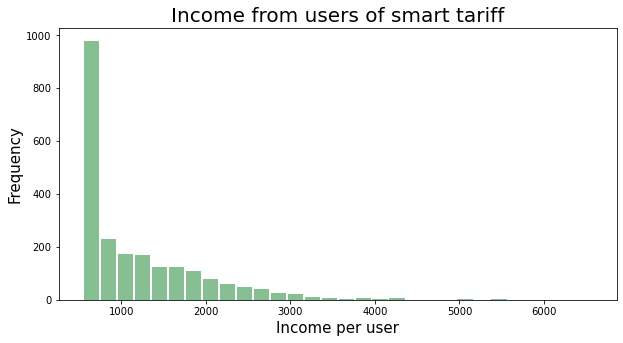

In [50]:
smart_income.plot.hist(figsize=(10,5), bins=30, rwidth=0.9, color='#86bf91');
plt.title('Income from users of smart tariff')
plt.xlabel('Income per user', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

In [51]:
smart_income.sum()

2624151.0

Many smart tariff subscribers pay only a subscription fee. About half of the users exceed the limit.

In [52]:
ultra_income.describe()

count     985.000000
mean     2050.659898
std       338.714798
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4650.000000
Name: month_income, dtype: float64

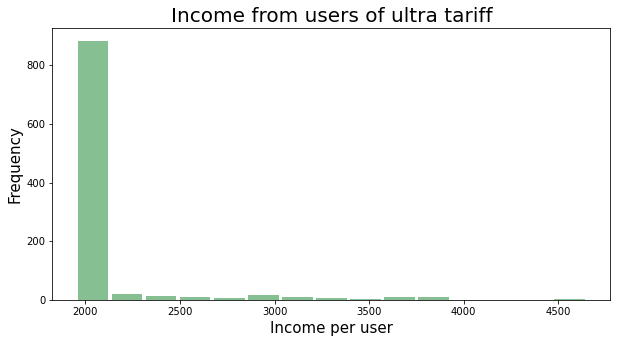

In [53]:
ultra_income.plot.hist(figsize=(10,5), bins=15, rwidth=0.9, color='#86bf91');
plt.title('Income from users of ultra tariff')
plt.xlabel('Income per user', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

In [54]:
ultra_income.sum()

2019900.0

Most users of the ultra tariff pay only the subscription fee, but there are those who lack the included services and pay over the limit.

In [55]:
# creation of two samples with monthly revenue of users from Moscow and from other regions
msc_income = calls_pivot.query('city == "Москва"')['month_income']
other_income = calls_pivot.query('city != "Москва"')['month_income']

<div class="alert alert-info">
Null hypothesis H₀: the average revenue of users from Moscow is equal to the revenue of users from other regions
<br>Alternative hypothesis H₁ - the average revenue of users from Moscow differs from the revenue of users from other regions
</div>

In [56]:
alpha = 0.05
results2 = st.ttest_ind(msc_income, other_income)
print('p-value:', results2.pvalue)
if results2.pvalue < alpha:
    print('Rejecting the null hypothesis')
else:
    print('Failed to reject the null hypothesis') 

p-value: 0.3729729010391226
Failed to reject the null hypothesis


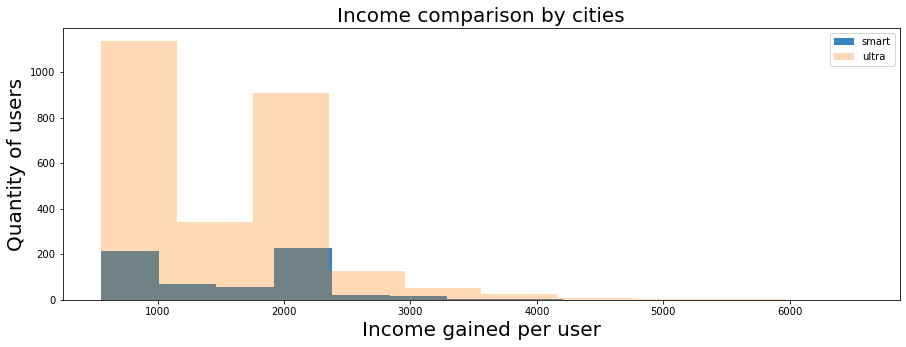

In [57]:
fig, ax = plt.subplots(figsize=(15,5))
ax.hist(msc_income, alpha=0.9, label='msc_income')
ax.hist(other_income, alpha=0.3, label='other_income')
ax.set(title='Income comparison by cities', ylabel='Quantity of users', xlabel='Income gained per user')
plt.legend(loc='upper right')
plt.rc('axes', titlesize=20) 
plt.rc('axes', labelsize=20)
ax.legend(['smart','ultra'])
plt.show()

### Conclusion

Two hypotheses have been put forward:
1. The average revenue of users of "Ultra" and "Smart" tariffs is equal to
2. The average revenue of users from Moscow is equal to the revenues of users from other regions
I used the scipy.stats.ttest_ind method to test hypotheses about the equality of the mean of two general populations based on samples taken from them.

Critical level of statistical significance - 0.05

I rejected the hypothesis that the average revenue of users of the Ultra and Smart tariffs is equal. p-value below the critical level of statistical significance (0.05). This means that **the average revenue of Ultra and Smart users is different**. p-value is 0 because all users of the ultra tariff pay exactly the amount of the subscription fee.

The hypothesis that the average revenue of users from Moscow is equal to the revenue of users from other regions could not be rejected, because the p-value is above the critical level of statistical significance (0.05). This means that with a probability of about 28%, such a difference or more can be obtained by chance. This is clearly too high a probability to conclude that there is a significant difference between revenue from users from Moscow and other regions.


## Шаг 5. General conclusion

In this work, I studied and processed the data, converted it into the correct format, corrected errors and checked them for duplicates.
I also calculated additional parameters for further research:
 - the number of calls made and spent minutes of conversation by month;
 - the number of sent messages by month;
 - the amount of Internet traffic used by months;
 - monthly revenue from each user.
 

Using exploratory data analysis, **it was possible to find out** the average number of services used by a subscriber per month:

|Tariff|smart|ultra|
|:----|:----|:----|
|Qty of minutes|394|497|
|Qty of messages|33|49|
|Qty of internet (Gb)|15|18.5|

With the help of histograms, it was possible to draw the following conclusions:
 - Smart tariff users talk for about 400 minutes on average and the values ​​are evenly distributed. And among the users of the ultra tariff there are a lot of those who just do not speak on the phone (about 50 people), and also more people who talk more than 700 minutes a month.
 - There is some regularity in the number of SMS for users of both tariffs - many of them do not send messages at all.
 - The amount of traffic used by smart tariff subscribers looks like a normal distribution, but in the ultra tariff there is no such obvious surge, the values ​​are evenly distributed. Ultra tariff subscribers often use a very large amount of the Internet (more than 25 GB per month).

The hypothesis that the average revenue of users of the Ultra and Smart tariffs is equal, **was rejected**.
The hypothesis that the average revenue of users from Moscow is equal to the revenue of users from other regions was **rejected**.

Although the subscription fee for the ultra tariff is initially higher than for the smart tariff, as a result, smart tariff subscribers more often go beyond the limits and pay in excess of the tariff. And since the number of smart subscribers in the sample was twice as large, they brought more money in total than ultra tariff subscribers. **It is more profitable to promote the smart tariff.**
I would recommend evaluating the costs of providing services in order to calculate the margin for each tariff.
